Notebook to compare different gamma disitribution parameters

In [32]:
%pylab inline
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from Joint_method_functions import *
from Per_locus_validation_functions import *
PLOTDIR = '/storage/BonnieH/selection_project/figures/supp_figures/'

Populating the interactive namespace from numpy and matplotlib


In [33]:
def plotcdf():
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    a_vals = [0.2,0.3,0.6]
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,sharey=True, figsize = (12,4))
                
    fig.suptitle('CDF') 
                
    dic_ax = {}
    dic_ax[10**-5] = ax1
    dic_ax[10**-4] = ax2
    dic_ax[10**-3] = ax3
    dic_ax[10**-2] = ax4       
                            
    for mean in means:
        plt1 = dic_ax[mean]
        for a in a_vals:
            # Plot ground truth

            s = [] # List of s values drawn from gamma distribution
            num_sims = 1000
            for i in range(0, num_sims):
                s_val = np.random.gamma(a, mean/a)
                s.append(s_val)

            bins_list = [0]
            exponents = [10**-5, 10**-4, 10**-3, 10**-2]
            for j in exponents:
                for i in np.arange(1,10,0.01):
                    bins_list.append(i*j)

            bins_list.append(0.1)
            bins_list.append(1)

            values, base = np.histogram(s, bins=bins_list)

            cumulative = list(np.cumsum(values))
            maximum = max(cumulative)
            cumulative_scaled = []
            for elem in cumulative:
                elem = elem/maximum
                cumulative_scaled.append(elem)

            base_plot = base
            plt1.plot(base_plot[:-1], cumulative_scaled, label = 'a = ' + str(a), linewidth = 3)
            plt1.set_xlim(10**-5, 0.1)
            plt1.set_xscale('log')
            plt1.set_title(   'Mean s=' + str(mean) ) 
            
    # Add a big axis and hide frame
    plt.legend(bbox_to_anchor=(1, 1)) 
    fig.add_subplot(111, frameon=False)
    
    # Hide ticks and tick labels of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel('s')             
    plt.ylabel('Cumulative Frequency')

In [34]:
def plotpdf():
    fig_num = 1
    num_sims = 1000
    avals = [0.2,0.3,0.6]
    means = [10**-5,10**-4,10**-3,10**-2]
    s = {}
    
    for mean in means:
        for a in avals:
            s[(mean,a)] = []
            
    for mean in means:
        for a in avals:
            for i in range(0, num_sims):
                s_val = np.random.gamma(a, mean/a)
                #if s_val > 0.1:
                    #s_val = 0.1
                if s_val < 10**-5:
                    s_val = 10**-5
                s[(mean, a)].append(np.log10(s_val))
        
        fig_num = fig_num + 1
        fig = plt.figure(fig_num)

        for a in avals:
            
            bins_val = np.linspace(-5,0,30)
            values, base = np.histogram(s[(mean,a)], bins=bins_val)
            
            val_norm = []
            for value in values:
                val_norm.append(value/num_sims)
            plt.plot(base[0:len(base)-1], val_norm,label = 'a = ' + str(a))
            
        plt.title('PDF Mean s = ' + str(mean),size=15)
        plt.xlabel('Log s',size=15)
        plt.ylabel('Fraction of values',size=15)
        plt.xticks(fontsize=15) 
        plt.yticks(fontsize=15)
        plt.legend(prop={'size': 15})

In [35]:
def main():
    plotcdf()
    plotpdf()

CPU times: user 583 ms, sys: 1.94 ms, total: 585 ms
Wall time: 584 ms


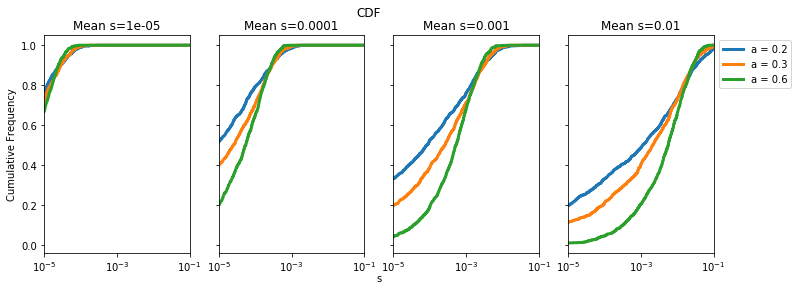

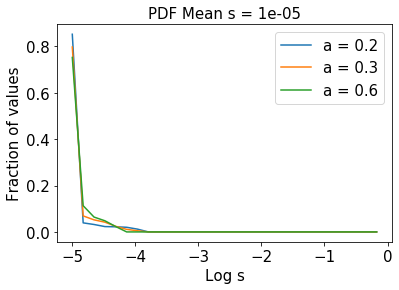

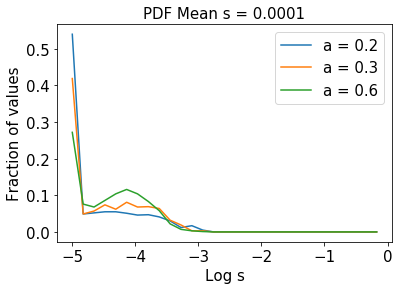

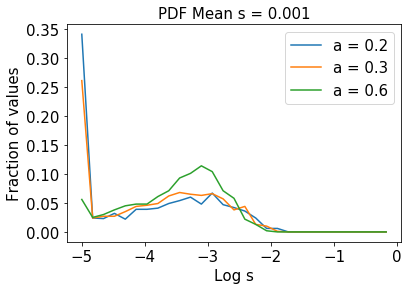

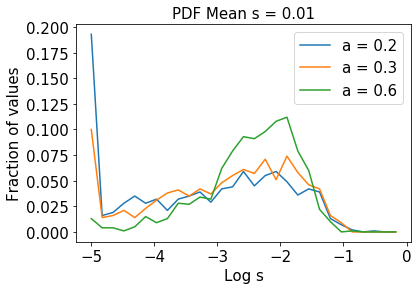

In [36]:
%%time
if __name__ == '__main__':
    main()